# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [61]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9807 non-null   int64  
 1   revenue               9807 non-null   int64  
 2   original_title        9807 non-null   object 
 3   director              9807 non-null   object 
 4   genres                9807 non-null   object 
 5   production_companies  9807 non-null   object 
 6   release_year          9807 non-null   int64  
 7   budget_adj            9807 non-null   float64
 8   revenue_adj           9807 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 766.2+ KB


In [63]:
df = pd.read_csv('imdb-movies.csv')
df.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [64]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [65]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime'], axis=1, inplace=True)

In [66]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [67]:
df.head()

,popularity,budget,revenue,original_title,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [68]:
df.drop(['release_date','vote_count', 'vote_average', 'popularity'], axis=1, inplace=True)

### Data Cleaning

In [69]:
# Delete all records with null, or empty values

df.isna().sum()
df.isnull().sum()


budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [70]:
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [71]:
df[df.isna().any(axis=1)]

,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
228,0,0,Racing Extinction,Louie Psihoyos,Adventure|Documentary,NaN,2015,0.0,0.0
259,0,0,Crown for Christmas,Alex Zamm,TV Movie,NaN,2015,0.0,0.0
295,0,0,12 Gifts of Christmas,Peter Sullivan,Family|TV Movie,NaN,2015,0.0,0.0
298,0,0,The Girl in the Photographs,Nick Simon,Crime|Horror|Thriller,NaN,2015,0.0,0.0
328,0,0,Advantageous,Jennifer Phang,Science Fiction|Drama|Family,NaN,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10804,0,0,Interiors,Woody Allen,Drama,NaN,1978,0.0,0.0
10806,0,0,Gates of Heaven,Errol Morris,Documentary,NaN,1978,0.0,0.0
10816,0,0,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,Comedy,NaN,1978,0.0,0.0
10842,0,0,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,Animation|Family,NaN,1966,0.0,0.0


In [72]:
df.dropna(inplace=True)

In [73]:
df.isna().sum()
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [74]:
df.to_csv('imdb_genre.csv', index=False)
df.to_csv('imdb_company.csv', index=False)

In [75]:
genre = pd.read_csv('imdb_genre.csv')
company = pd.read_csv('imdb_company.csv')

In [76]:
genre.drop('production_companies', axis=1,inplace=True)

In [77]:
company.drop('genres',axis=1,inplace=True)

In [78]:
genre.head()

,budget,revenue,original_title,director,genres,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [79]:
company.head()

,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [80]:
# need to seperate production companies

In [81]:
company

,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...
9802,0,0,The Endless Summer,Bruce Brown,Bruce Brown Films,1966,0.000000e+00,0.000000e+00
9803,0,0,Grand Prix,John Frankenheimer,Cherokee Productions|Joel Productions|Douglas ...,1966,0.000000e+00,0.000000e+00
9804,0,0,Beregis Avtomobilya,Eldar Ryazanov,Mosfilm,1966,0.000000e+00,0.000000e+00
9805,0,0,"What's Up, Tiger Lily?",Woody Allen,Benedict Pictures Corp.,1966,0.000000e+00,0.000000e+00


In [82]:
company_multiple = company[company.production_companies.str.contains('|', regex=False)]
company_multiple.production_companies.count()

6392

In [83]:
comp1 = company_multiple.copy()
comp2 = company_multiple.copy()


while company_multiple.production_companies.count() > 0:
    comp1['production_companies'] = comp1['production_companies'].apply(lambda x:x.split('|')[0])
    comp1['production_companies'] = comp1['production_companies'].apply(lambda x:'|'.join(x.split('|')[1:]))

    company.drop(company_multiple.index, inplace=True)
    company = company.append(comp1.append(comp2), ignore_index=True)

    company_multiple = company[company.production_companies.str.contains('|', regex=False)]


KeyboardInterrupt: 

In [84]:
company[company.productions_companies.str.contains('|', regex=False)]

AttributeError: 'DataFrame' object has no attribute 'productions_companies'

In [85]:
company = company[company['production_companies']!= '']

In [86]:
genre_multiple = genre[genre.genres.str.contains('|', regex=False)]

In [88]:
genre_multiple.genres.count()

7833

In [91]:
g1 = genre_multiple.copy()
g2 = genre_multiple.copy()


while genre_multiple.genres.count() > 0:
    g1['genres'] = g1['genres'].apply(lambda x:x.split('|')[0])
    g2['genres'] = g2['genres'].apply(lambda x:'|'.join(x.split('|')[1:]))
    
    genre.drop(genre_multiple.index, inplace=True)
    genre = genre.append(g1.append(g2), ignore_index=True)
    
    multi_genre = genre[genre.genres.str.contains('|', regex=False)]

genre[genre.genres.str.contains('|', regex=False)]

KeyboardInterrupt: 

<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

In [ ]:
company_10 = company.query('release_year > 2005').copy()

In [ ]:
company_10.production_companies.value_counts()

DreamWorks Animation                                                                                                                                   25
Marvel Studios                                                                                                                                         22
The Asylum                                                                                                                                             21
Pixar Animation Studios                                                                                                                                21
Walt Disney Pictures                                                                                                                                   18
                                                                                                                                                       ..
LEGO|Threshold Animation Studios|Tinseltown Toons                           

In [92]:
count = company_10.production_companies.value_counts().index
count

Index(['DreamWorks Animation', 'Marvel Studios', 'The Asylum',
       'Pixar Animation Studios', 'Walt Disney Pictures', 'Dimension Films',
       'Lions Gate Films', 'New Line Cinema', 'Disney Channel', 'Warner Bros.',
       ...
       'Dark Castle Entertainment|Fever Dreams|Warner Premiere|Ludovico Technique',
       'Diaphana Films', 'Motion Picture Corporation of America',
       'Omnilab Media|Ambience Entertainment|Screen Australia|Film Victoria',
       'Miramax Films|Hollywood Gang Productions|Radar Pictures',
       'LEGO|Threshold Animation Studios|Tinseltown Toons',
       'Fox Searchlight Pictures|Butcher's Run Films|Informant Media',
       'Industrial Development Corporation of South Africa|Studio Hamburg International Production (SHIP)|Saltire Entertainment|Two Oceans Production (TOP)',
       'BBC Films|Screen West Midlands|PathÃ©|Forward Films|Slingshot Productions',
       'SPAD Films|KL Productions|Alter Films'],
      dtype='object', length=4148)

In [93]:
company_top_5 = pd.DataFrame()

In [94]:
for company in count[:5]:
    company_top_5 = company_top_5.append(company_10.query('production_companies == @company'))
company_10

,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...
6930,0,0,Bring It On: In It To Win It,Steve Rash,Universal Pictures|Beacon Communications,2007,0.000000e+00,0.000000e+00
6931,0,0,Twitches Too,Stuart Gillard,Walt Disney Studios Home Entertainment|Disney ...,2007,0.000000e+00,0.000000e+00
6932,0,0,Beneath,Dagen Merrill,MTV Films|Paramount Classics,2007,0.000000e+00,0.000000e+00
6933,1100000,0,Testosteron,Tomasz Konecki|Andrzej Saramonowicz,Van Worden,2007,1.156835e+06,0.000000e+00


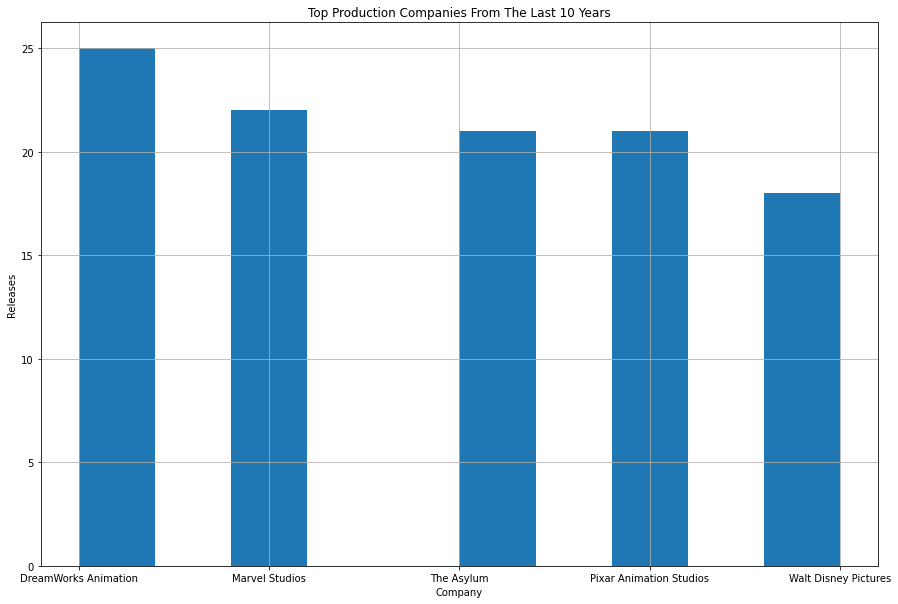

In [96]:
company_top_5.production_companies.hist(figsize=(15,10));
plt.title('Top Production Companies From The Last 10 Years');
plt.ylabel('Releases');
plt.xlabel('Company');

### What 5 movie genres grossed the highest all-time?

In [97]:
genre.groupby(['genres']).revenue.sum().nlargest(5)

genres
             20582587931940
Action        4994620895070
Adventure     3822632068983
Comedy        2524288381868
Drama         2467957712255
Name: revenue, dtype: int64

### Who are the top 5 grossing directors?

In [98]:
df.groupby(['director']).revenue.sum().nlargest(5)

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64

### Compare the revenue of the highest grossing movies of all time.

In [99]:
top20 = df.nlargest(20,'revenue')

In [101]:
top20

,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
1386,237000000,2781505847,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2.408869e+08,2.827124e+09
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
5231,200000000,1845034188,Titanic,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997,2.716921e+08,2.506406e+09
4361,220000000,1519557910,The Avengers,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,2012,2.089437e+08,1.443191e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09
14,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015,2.575999e+08,1.292632e+09
3374,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011,1.211748e+08,1.287184e+09
5422,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013,1.404050e+08,1.192711e+09
5425,200000000,1215439994,Iron Man 3,Shane Black,Action|Adventure|Science Fiction,Marvel Studios,2013,1.872067e+08,1.137692e+09


Text(0, 0.5, 'Revenue in Billions')

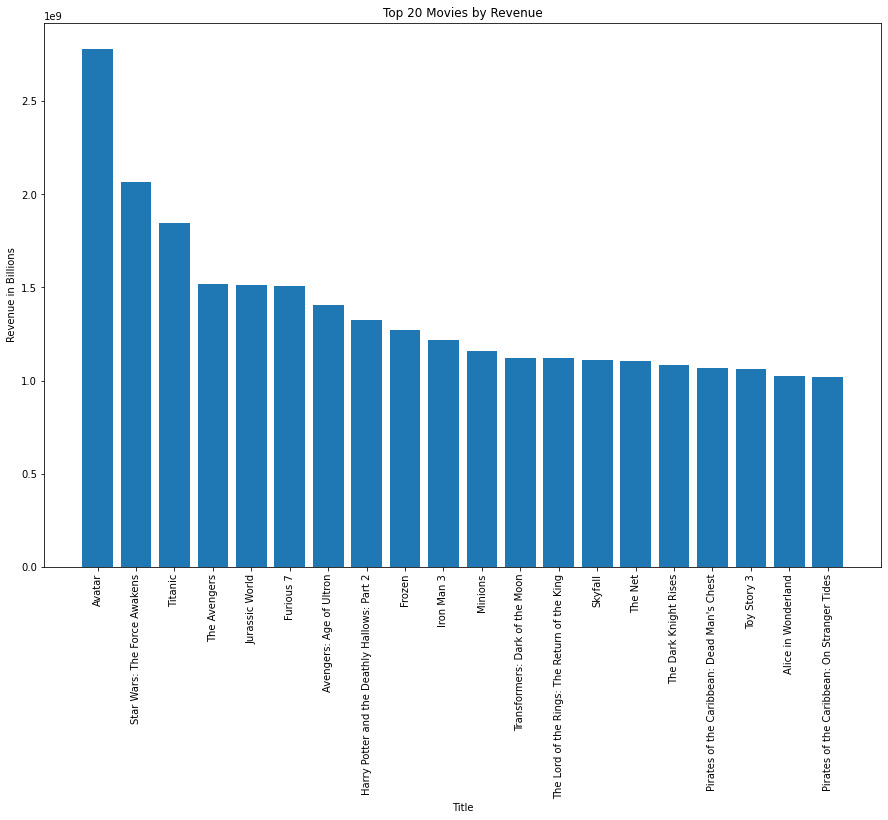

In [102]:
plt.subplots(figsize=(15, 10))
plt.bar(top20['original_title'], top20['revenue']);
plt.xticks(rotation=90);
plt.title('Top 20 Movies by Revenue');
plt.xlabel('Title')
plt.ylabel('Revenue in Billions')

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.